# INSURANCE CLAIM PROBABILITY BASED ON  POLICY FEATURES AND SAFETY RATINGS

## Problem Statement
Insurance companies face the challenge of accurately predicting the likelihood of claims on car insurance policies. With a variety of factors influencing claim frequency and severity, it is difficult to assess risk and determine appropriate premiums for policyholders. The problem arises from the complexity and variety of data involved, including demographic details, vehicle specifications, and past claim histories. Inaccurate predictions can lead to suboptimal premium pricing, financial loss, and inefficient claim management.

## Objective:
The objective is to develop a robust predictive model capable of determining the likelihood of an insurance claim being made. Additionally, the goal is to identify and analyze the critical factors that influence claim frequency, providing valuable insights for risk assessment and decision-making in insurance underwriting and claims management.

In [1]:
# Importing required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [197]:
# importing data using pandas
data = pd.read_csv(r'data/Data.csv')
data.shape

(58592, 44)

### a. Column names and Datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [3]:
data.head(10)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   
5   ID00006       1.018709        0.07             0.519231           C6   
6   ID00007       0.097992        0.16             0.403846           C7   
7   ID00008       0.509085        0.14             0.423077           C8   
8   ID00009       0.282394        0.07             0.298077           C7   
9   ID00010       0.566255        0.04             0.442308           C9   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   
5               13051     3      C2    M4    Diesel  ...             Yes   
6                6112     4      B2    M5    Diesel  ...              No   
7                8794     1      B2    M6    Petrol  ...             Yes   
8                6112     3      C2    M4    Diesel  ...             Yes   
9               17804     1      B2    M7    Petrol  ...             Yes   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   
5                 Yes                Yes                Yes   
6                 Yes                Yes                Yes   
7                 Yes                Yes                Yes   
8                 Yes                Yes                Yes   
9                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   
5                              Yes                            No    Yes   
6                               No                            No    Yes   
7                              Yes                           Yes    Yes   
8                              Yes                            No    Yes   
9                              Yes                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  
5            Yes           3        0  
6            Yes           5        0  
7            Yes           2        0  
8            Yes           3        0  
9            Yes           0        0  

[10 rows x 44 columns]

### Data Summary:
* **Total Rows:** 58,592
* **Total Columns:** 44

### Data Types Overview:
* **float64:** 4 columns
* **int64:** 12 columns
* **object:** 28 columns (categorical)

In [17]:
data.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

**Observations:**

1. **`policy_tenure`**: The values range between 0.0027 and 1.3966, with a mean of 0.611, indicating some policies are quite new, while others are close to the maximum tenure.
   
2. **`age_of_car`**: Most values are closer to 0, which suggests a larger portion of cars are relatively new

3. **`age_of_policyholder`**: The minimum value is 0.2885, and the 75th percentile is 0.54 with maximum as 1, showing that policyholders are mostly younger adults or middle-aged individuals.

4. **`population_density`**: The data appears to be signifcantly skewed to the right for this column indicating most of the population density is less than 27,000.

5. **`ncap_rating`**: Most cars have a rating of 1 to 3, with a few reaching the maximum value of 5.

6. **`gross_weight`**: The range is between 1,051 kg and 1,720 kg, suggesting most cars fall within this weight range, with larger vehicles closer to the maximum.

7. **`is_claim`**: A significant number of policies do not have claims, as indicated by a mean of 0.064, which reflects a highly **imbalanced class distribution**.


**Note:**

**1. Age of Car**:
   - The values in the **`age_of_car`** column are normalized, likely using a MinMaxScaler, resulting in a range between 0 and 1.
   - Interpreting the original age of the car is difficult without details about the original data or the parameters used for normalization.

**2. Policy Tenure & Age of Policyholder**:
   - The **`policy_tenure`** and **`age_of_policyholder`** columns contains float values that appear to have been transformed.
   - Understanding these columns would require additional context or information on the data preprocessing. Interpreting these values as literal time periods and ages could be misleading.

**3. General Observation**:
   - These columns are more reliable for analyzing distributions rather than interpreting the raw numerical values.
   - Proper context and transformation details are necessary to accurately understand the original data.


### b. Check for null values

In [20]:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

**There are no null values present in any of the data columns**

### c. Check for duplicated records

In [34]:
data.duplicated().sum()

0

**There are no duplicated records in the data set**

### d . Categorical Columns Review

Reviewing the values in categorical columns to identify any potential inconsistencies or invalid entries.

In [5]:
categorical_columns = data.select_dtypes(include='object')

In [6]:
for i in categorical_columns.iloc[:,1:].columns:
    print('*'*10 +' '+ i +' '+'*'*10 )
    print(set(categorical_columns[i]))
    print()
    

********** area_cluster **********
{'C8', 'C18', 'C22', 'C12', 'C16', 'C7', 'C2', 'C19', 'C11', 'C20', 'C21', 'C5', 'C1', 'C9', 'C13', 'C6', 'C10', 'C14', 'C4', 'C17', 'C15', 'C3'}

********** segment **********
{'B1', 'C1', 'Utility', 'B2', 'C2', 'A'}

********** model **********
{'M6', 'M1', 'M2', 'M7', 'M11', 'M5', 'M8', 'M10', 'M9', 'M3', 'M4'}

********** fuel_type **********
{'Petrol', 'Diesel', 'CNG'}

********** max_torque **********
{'60Nm@3500rpm', '113Nm@4400rpm', '200Nm@3000rpm', '85Nm@3000rpm', '200Nm@1750rpm', '91Nm@4250rpm', '170Nm@4000rpm', '82.1Nm@3400rpm', '250Nm@2750rpm'}

********** max_power **********
{'61.68bhp@6000rpm', '67.06bhp@5500rpm', '118.36bhp@5500rpm', '113.45bhp@4000rpm', '88.50bhp@6000rpm', '55.92bhp@5300rpm', '40.36bhp@6000rpm', '88.77bhp@4000rpm', '97.89bhp@3600rpm'}

********** engine_type **********
{'1.5 Turbocharged Revotorq', 'F8D Petrol Engine', '1.0 SCe', '1.5 L U2 CRDi', '1.2 L K12N Dualjet', 'K Series Dual jet', 'K10C', 'G12B', '1.5 Turbocha

**Observation:**
* All categorical columns contain valid values with no inconsistencies.
* The majority of these columns have fewer than 4 unique values, mostly of the 'Yes' or 'No' type.

### e. Numerical columns Review
Reviewing the values in Numerical columns

In [7]:
numerical_columns = data.select_dtypes(exclude='object')

In [13]:
for i in numerical_columns.iloc[:,:4].columns:
    print('*'*10 +' '+ i +' '+'*'*10 )
    print('No of unique values: ',numerical_columns[i].unique().shape[0])
    print() 

for i in numerical_columns.iloc[:,4:].columns:
    print('*'*10 +' '+ i +' '+'*'*10 )
    print(set(numerical_columns[i]))
    print()   

********** policy_tenure **********
No of unique values:  58592

********** age_of_car **********
No of unique values:  49

********** age_of_policyholder **********
No of unique values:  75

********** population_density **********
No of unique values:  22

********** make **********
{1, 2, 3, 4, 5}

********** airbags **********
{1, 2, 6}

********** displacement **********
{998, 999, 1196, 1197, 1199, 1493, 1497, 1498, 796}

********** cylinder **********
{3, 4}

********** gear_box **********
{5, 6}

********** turning_radius **********
{4.85, 5.0, 4.6, 4.8, 5.2, 4.7, 4.9, 4.5, 5.1}

********** length **********
{3845, 3655, 4300, 3731, 3445, 3990, 3993, 3675, 3995}

********** width **********
{1475, 1735, 1579, 1515, 1745, 1811, 1620, 1755, 1790, 1695}

********** height **********
{1825, 1635, 1475, 1606, 1515, 1675, 1490, 1523, 1530, 1500, 1501}

********** gross_weight **********
{1660, 1185, 1410, 1155, 1510, 1490, 1335, 1720, 1051, 1340}

********** ncap_rating **********
{0

**Observation:**

**Categorical Nature of Some Numerical Columns**: 

* Several numerical columns, such as `airbags`, `displacement`, `cylinder`, `gear_box`, `turning_radius`, `length`, `width`, `height`, `gross_weight`, `ncap_rating`, and `is_claim`, contain discrete, limited values.
* They categorize the data into specific groups rather than representing continuous ranges. 
* These columns can be considered as categorical variables for further analysis and modeling as needed, even though they appear numerically.

### Outlier Detection in Continuous Numerical Columns

In [14]:
continuous_cols = list(numerical_columns.iloc[:,:4].columns)
continuous_cols

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']

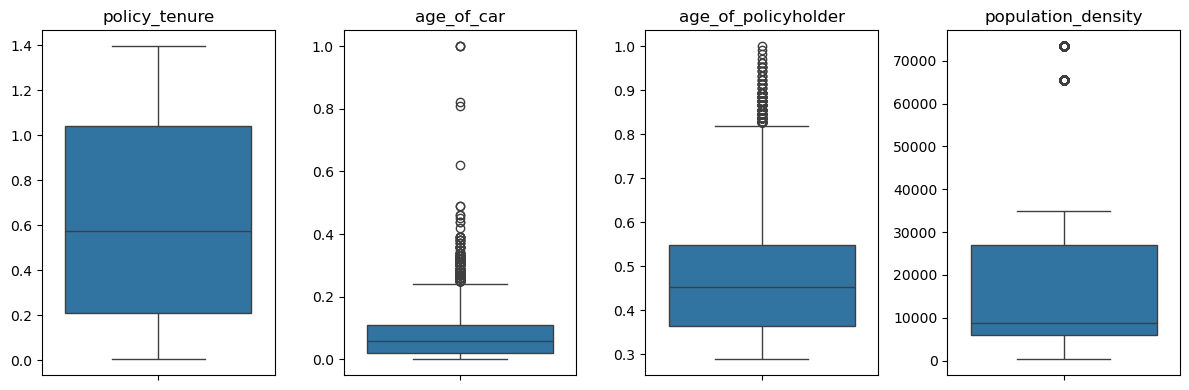

In [15]:
fig, ax = plt.subplots(1,4, figsize = (12,4))

for i, col in enumerate(continuous_cols):
    sns.boxplot(data= data[col], ax = ax[i])
    ax[i].set_title(f'{col}')
    ax[i].set_ylabel("")
    
fig.tight_layout()

**Outlier Handling:**

- **Age of Car & Age of Policyholder:**  
  After experimenting with various quantile thresholds, removing values above the 99th percentile for **`age_of_car`** and **`age_of_policyholder`** effectively can remove most outliers while causing minimal loss of data.

- **Population Density:**  
  We will retain the outliers in **`population_density`**, as they could represent larger geographical regions or unique locations. These values may carry significant information that could influence the prediction of claims, and removing them might eliminate valid and informative data.

- **Policy Tenure:**  
  No outliers were found in the **`policy_tenure`** column

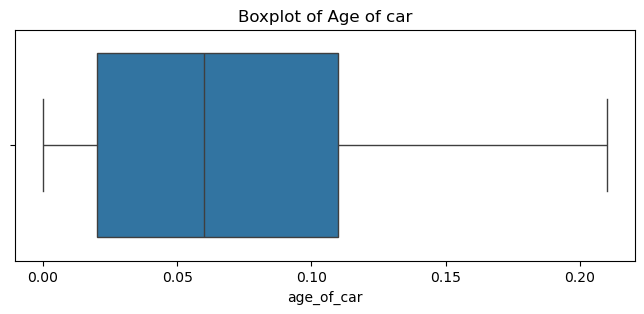

In [5]:
# Removing outliers from age_of_car column which are above 99th percentile
extreme_age_indices = data['age_of_car'] > data['age_of_car'].quantile(0.99)
plt.figure(figsize=(8,3))
sns.boxplot(x='age_of_car', data=data.loc[~extreme_age_indices])
plt.title('Boxplot of Age of car')
plt.show()

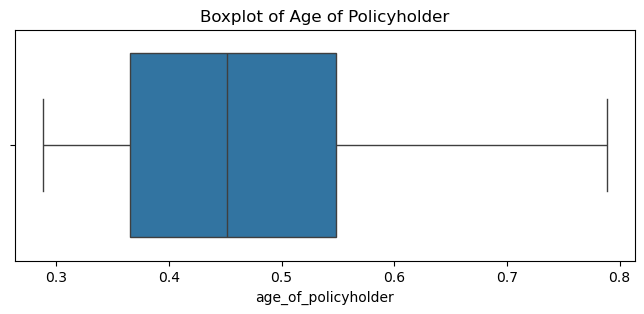

In [6]:
# Removing outliers from age_of_car column which are above 99th percentile
extreme_age_of_policyholder_indices = data['age_of_policyholder'] > data['age_of_policyholder'].quantile(0.99)
plt.figure(figsize=(8,3))
sns.boxplot(x='age_of_policyholder', data=data.loc[~extreme_age_of_policyholder_indices])
plt.title('Boxplot of Age of Policyholder')
plt.show()

## Exploratory Data Analysis

### Understanding the Distribution of the Target Column

In [26]:
data['is_claim'].value_counts(normalize = True)

is_claim
0    0.936032
1    0.063968
Name: proportion, dtype: float64

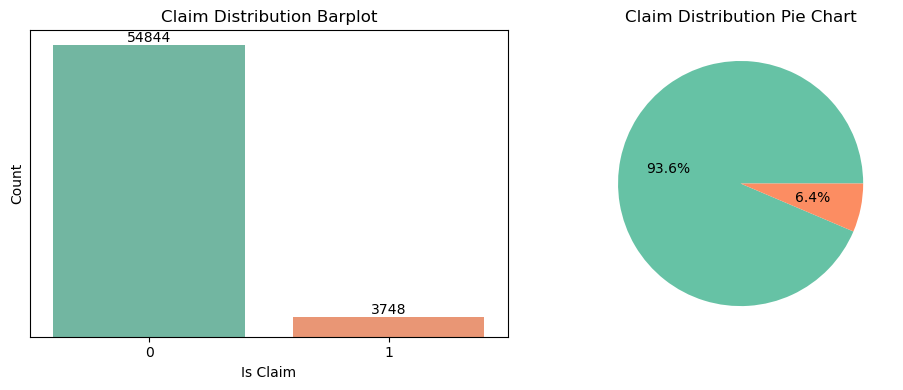

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 

ax1 = sns.barplot(x=[0, 1], y=data['is_claim'].value_counts(), ax=ax[0], palette='Set2')
ax[0].set_title('Claim Distribution Barplot')
ax[0].set_xticks([0, 1])
ax[0].set_xlabel('Is Claim')
ax[0].set_ylabel('Count')
ax[0].yaxis.set_ticks([])

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax[1].pie(data['is_claim'].value_counts(), autopct="%1.1f%%", colors=sns.color_palette('Set2'))
ax[1].set_title('Claim Distribution Pie Chart')

plt.tight_layout()
plt.show()

**Observation:**
* The target variable **`is_claim`** shows a significant class imbalance, with around 94% of the instances belonging to class 0 (no claim) and only 6% to class 1 (claim).
* This imbalance can result in biased model predictions, where the model is more likely to predict the majority class (class 0), thus reducing its ability to correctly identify instances of class 1 (claims).
* The imbalance should be effectively handled for better performance of the model.

### 2. Analysis of Continuous Variables

In [34]:
continuous_cols

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']

 Let's explore the distribution of the data

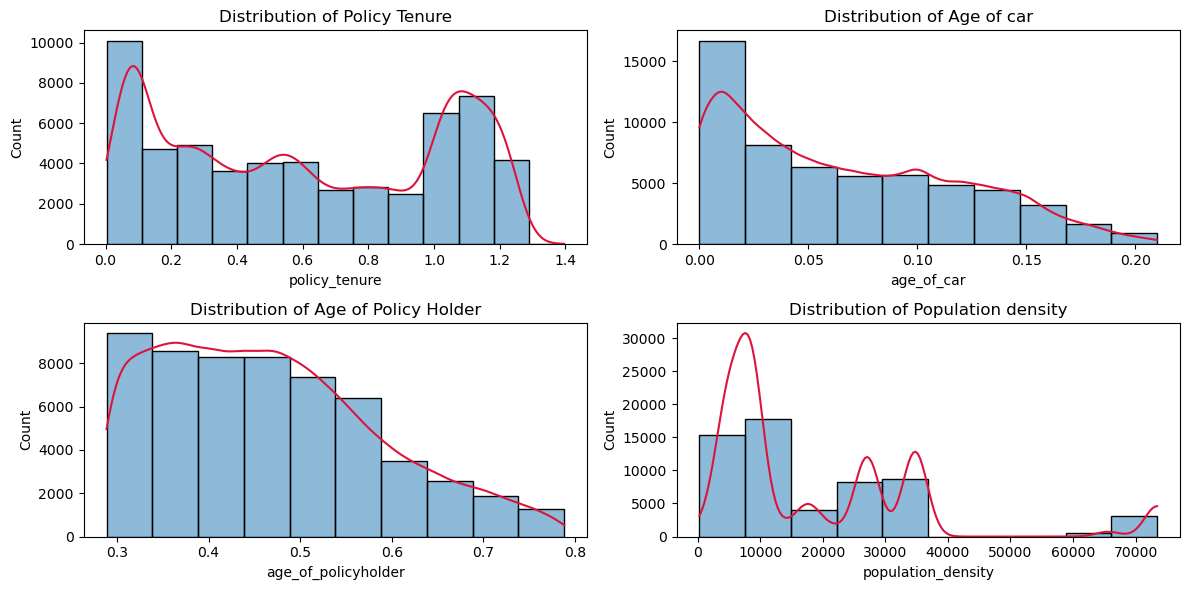

In [38]:
fig, ax = plt.subplots(2,2, figsize = (12,6))

sns.histplot(data['policy_tenure'],kde=True, ax = ax[0,0], bins=13,)
ax[0,0].set_title('Distribution of Policy Tenure', fontsize = 12)
ax[0,0].lines[0].set_color('crimson')

sns.histplot(data['age_of_car'],kde=True, ax = ax[0,1], bins = 10)
ax[0,1].set_title('Distribution of Age of car', fontsize = 12)
ax[0,1].lines[0].set_color('crimson')


sns.histplot(data['age_of_policyholder'],kde=True, ax = ax[1,0],bins = 10)
ax[1,0].set_title('Distribution of Age of Policy Holder', fontsize = 12)
ax[1,0].lines[0].set_color('crimson')

sns.histplot(data['population_density'],kde=True, ax = ax[1,1],bins = 10)
ax[1,1].set_title('Distribution of Population density', fontsize = 12)
ax[1,1].lines[0].set_color('crimson')

plt.tight_layout()

**Observations:**

1. **`policy_tenure`**: There is significant variation in the distribution. It shows a high frequency at the beginning, indicating newer or shorter tenures, and another peak is observed around right end indicating high older policies.
2. **`age_of_car`**: The column is highly right-skewed, indicating that most policies are purchased when the cars are relatively new. 

3. **`age_of_policyholder`**: This column is also right-skewed, suggesting that the majority of policies are taken by younger or middle-aged individuals, with fewer policies held by older individuals.

4. **`population_density`**: The majority of policies originate from regions with a population density around 10,000, where it peaks. while there are almost no policies between 40,000 and 60,000. A small rise is observed at 70,000.


### Comparison of Continuous Features by Claim Status

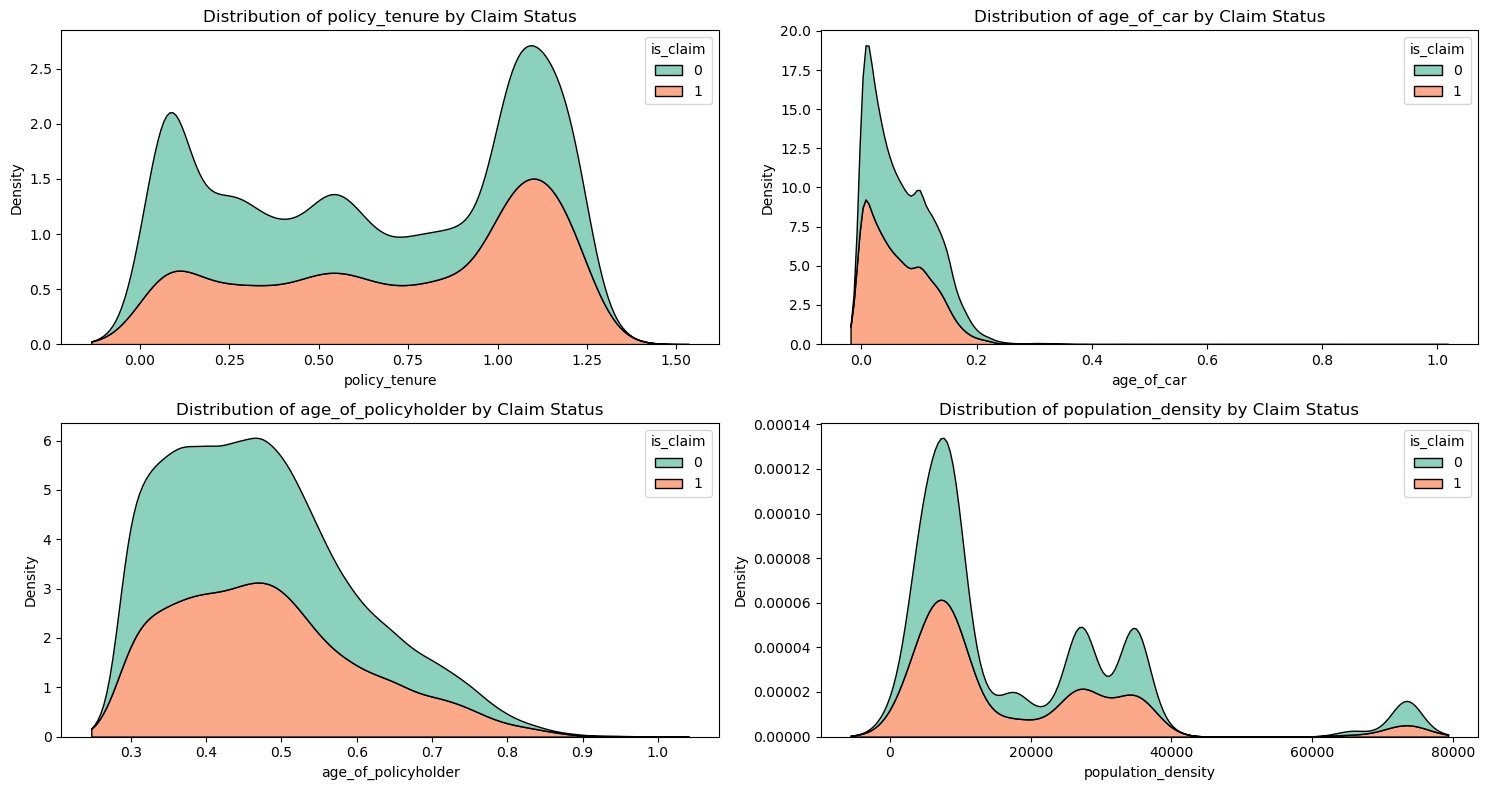

In [37]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=data, x=f'{col}', hue='is_claim', palette="Set2", multiple="stack", common_norm=False)
    plt.title(f"Distribution of {col} by Claim Status")

plt.tight_layout()
plt.show()

**Observation:**

- **`policy_tenure`**: The distribution indicates that the likelihood of claims slightly increases in the later stages of the policy, particularly during the last 4-6 months, compared to the early policy stages.

- **`age_of_car`**: Claims are more frequent for newer cars, as the majority of insurance claims are associated with younger vehicles.

- **`age_of_policyholder`**: The trend shows that younger to middle-aged policyholders make more claims, with fewer claims from older individuals.

- **`population_density`**: Claims are predominantly from less densely populated areas, which counters the intuition that more densely populated regions should have more accidents, making this trend noteworthy.


**Note:**

- It is important to note that both **`age_of_car`** and **`age_of_policyholder`** are highly right-skewed, while **`population_density`** and **`policy_tenure`** do not follow normal distributions. 
- Since many statistical analyses and models assume normality, this should be considered when performing hypothesis tests and selecting models for further experimentation, as non-normality might impact the performance or assumptions of certain models.

In [40]:
category_column_names = list(categorical_columns.iloc[:,1:].columns) #Removing policyID

In [41]:
category_column_names.extend(list(numerical_columns.iloc[:,4:].columns)) #Seperating continuous and discrete columns
print(category_column_names)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


### 3. Analysis of Categorical Variables on claim status

Given the large number of categorical columns (39), the analysis has been split into three groups for better clarity:

1. **Categorical Columns with Numerical Expressions**: Columns that contain numerical representations of categorical variables.
2. **Columns with More Than 3 Unique Values**: Columns that have more than 3 unique categories.
3. **Yes/No Type Columns**: Columns that are binary in nature, representing Yes/No values.

**Categorical Columns with Numerical Expressions**

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25), dpi=400)
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over categorical variables and plot
fig.suptitle("Analysis of Categorical Columns with Numerical Representations by Claim Status", fontsize=16, y=1.0)
for i, column in enumerate(list(numerical_columns.iloc[:,4:-1].columns)):
    order = data[column].value_counts().index
    ax1 = sns.countplot(data=data, x=column,hue='is_claim', ax=axes[i], order=order)
    axes[i].set_title(f'{column}')
    axes[i].tick_params(axis='x', rotation=0)# Rotate x labels for readability
    
    total_counts = data.groupby(column)['is_claim'].value_counts(normalize=True)

    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
for column in list(numerical_columns.iloc[:,4:-1].columns):
    print('*'*10 +' '+ column +' '+'*'*10 )
    print(data.groupby([column,'is_claim'])['is_claim'].count()/ data.value_counts(subset=column)*100)
    print() 

********** make **********
make  is_claim
1     0           93.560825
      1            6.439175
2     0           94.605984
      1            5.394016
3     0           93.572550
      1            6.427450
4     0           93.319735
      1            6.680265
5     0           93.708609
      1            6.291391
dtype: float64

********** airbags **********
airbags  is_claim
1        0           93.961952
         1            6.038048
2        0           93.635127
         1            6.364873
6        0           93.501592
         1            6.498408
dtype: float64

********** displacement **********
displacement  is_claim
796           0           93.858710
              1            6.141290
998           0           94.152888
              1            5.847112
999           0           94.605984
              1            5.394016
1196          0           93.961952
              1            6.038048
1197          0           93.144527
              1            6.8

**Observations:**

* The majority of cars are from **`make`** 1 and 2, with the others being relatively rare. While these makes have a higher frequency of claims, the percentage of claims is similar across all makes.

* Most cars have **`2 airbags`**, with very few having 1 airbag. No cars have 3, 4, or 5 airbags. The claim percentages, however, remain fairly consistent across these categories.

* Cars with **`displacement`** values of 1197, 796, and 1493 appear more frequently and also show higher claim frequencies. This suggests that specific displacement values may be associated with higher claim rates.

* There is a higher frequency of cars with **`4-cylinder engines`**, but there is no significant difference in claim rates between engine types.

* **`Gearbox`** type 5 is more common, but there is no noticeable difference in claim rates when compared to gearbox type 6.

* **`Turning radius`** values of 4.6, 4.8, and 5.2 have higher claim rates, though no clear pattern emerges suggesting that larger or smaller turning radii correlate with more claims. It is specifically these three values that show higher claims.

* **`Height values`** show a marginal increase in claims (up to 7%) for certain height values. This is a notable variation but not enough to indicate a strong correlation.

* Many cars have no **`NCAP safety rating`** (i.e., rating of 0). A lower safety rating appears to correlate with a higher frequency of claims, as most claims come from vehicles with ratings of 0, 2, or 3.

Overall, **`Make`**, **`Displacement`**, and **`Height`** show slight variations in claim rates, while the rest of the features have consistent patterns with non-claims consistently dominating.

**Analysis of Categorical Columns with More Than 3 Unique Values by Claim Status**

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25), dpi=400)
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over categorical variables and plot
fig.suptitle("Analysis of Categorical Columns with More Than 3 Unique Values by Claim Status", fontsize=16, y=1.0)

for i, column in enumerate(list(categorical_columns.iloc[:,1:8].columns)):
    order = data[column].value_counts().index
    ax1 = sns.countplot(data=data, x=column,hue='is_claim', ax=axes[i], order = order)
    axes[i].set_title(f'{column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability
    
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
for column in list(categorical_columns.iloc[:,1:8].columns):
    print('*'*10 +' '+ column +' '+'*'*10 )
    print(data.groupby([column,'is_claim'])['is_claim'].count()/ data.value_counts(subset=column)*100)
    print() 

********** area_cluster **********
area_cluster  is_claim
C1            0           94.822888
              1            5.177112
C10           0           95.309033
              1            4.690967
C11           0           94.059406
              1            5.940594
C12           0           94.524858
              1            5.475142
C13           0           94.303243
              1            5.696757
C14           0           92.322404
              1            7.677596
C15           0           95.071336
              1            4.928664
C16           0           94.264339
              1            5.735661
C17           0           96.138211
              1            3.861789
C18           0           89.256198
              1           10.743802
C19           0           92.542017
              1            7.457983
C2            0           92.917461
              1            7.082539
C20           0           95.412844
              1            4.587156
C21   

**Observations:**

* **`Area cluster`**: There appears to be a relationship between certain area clusters and higher claim frequencies. Specifically, **C8** cluster shows a higher frequency of claims compared to others.

* **`Segment`**: Segments **B2**, **A**, and **C2** exhibit higher claim rates, indicating that vehicles from these segments are more likely to generate claims.

* **`Model`**: Models **M1**, **M4**, and **M6** have higher claim frequencies, suggesting a correlation between specific car models and the likelihood of making a claim.

* **`Fuel Type`**: While all fuel types show similar claim patterns, **diesel** vehicles have a slightly higher percentage of claims compared to petrol and CNG vehicles.

* **`BHP and Torque`**: The power values like **88.77bhp@4000 rpm** and **200Nm@3000 rpm** show a higher percentage of claims. However, there is no clear pattern indicating that higher-powered vehicles cause more claims.

* **`Engine Type`**: The engine type **1.2 L K12N Dualjet** has the highest claim rate at **7.41%**, whereas **1.5 Turbocharged Revotron** shows the lowest at **4.13%**. This suggests that certain engine types might be more associated with risk factors for claims.

In summary, **`Area Cluster`** and **`Model`** stand out as strong indicators that could be useful for predicting claims.

**Analysis of Binary Yes/No Categorical Columns by Claim Status**

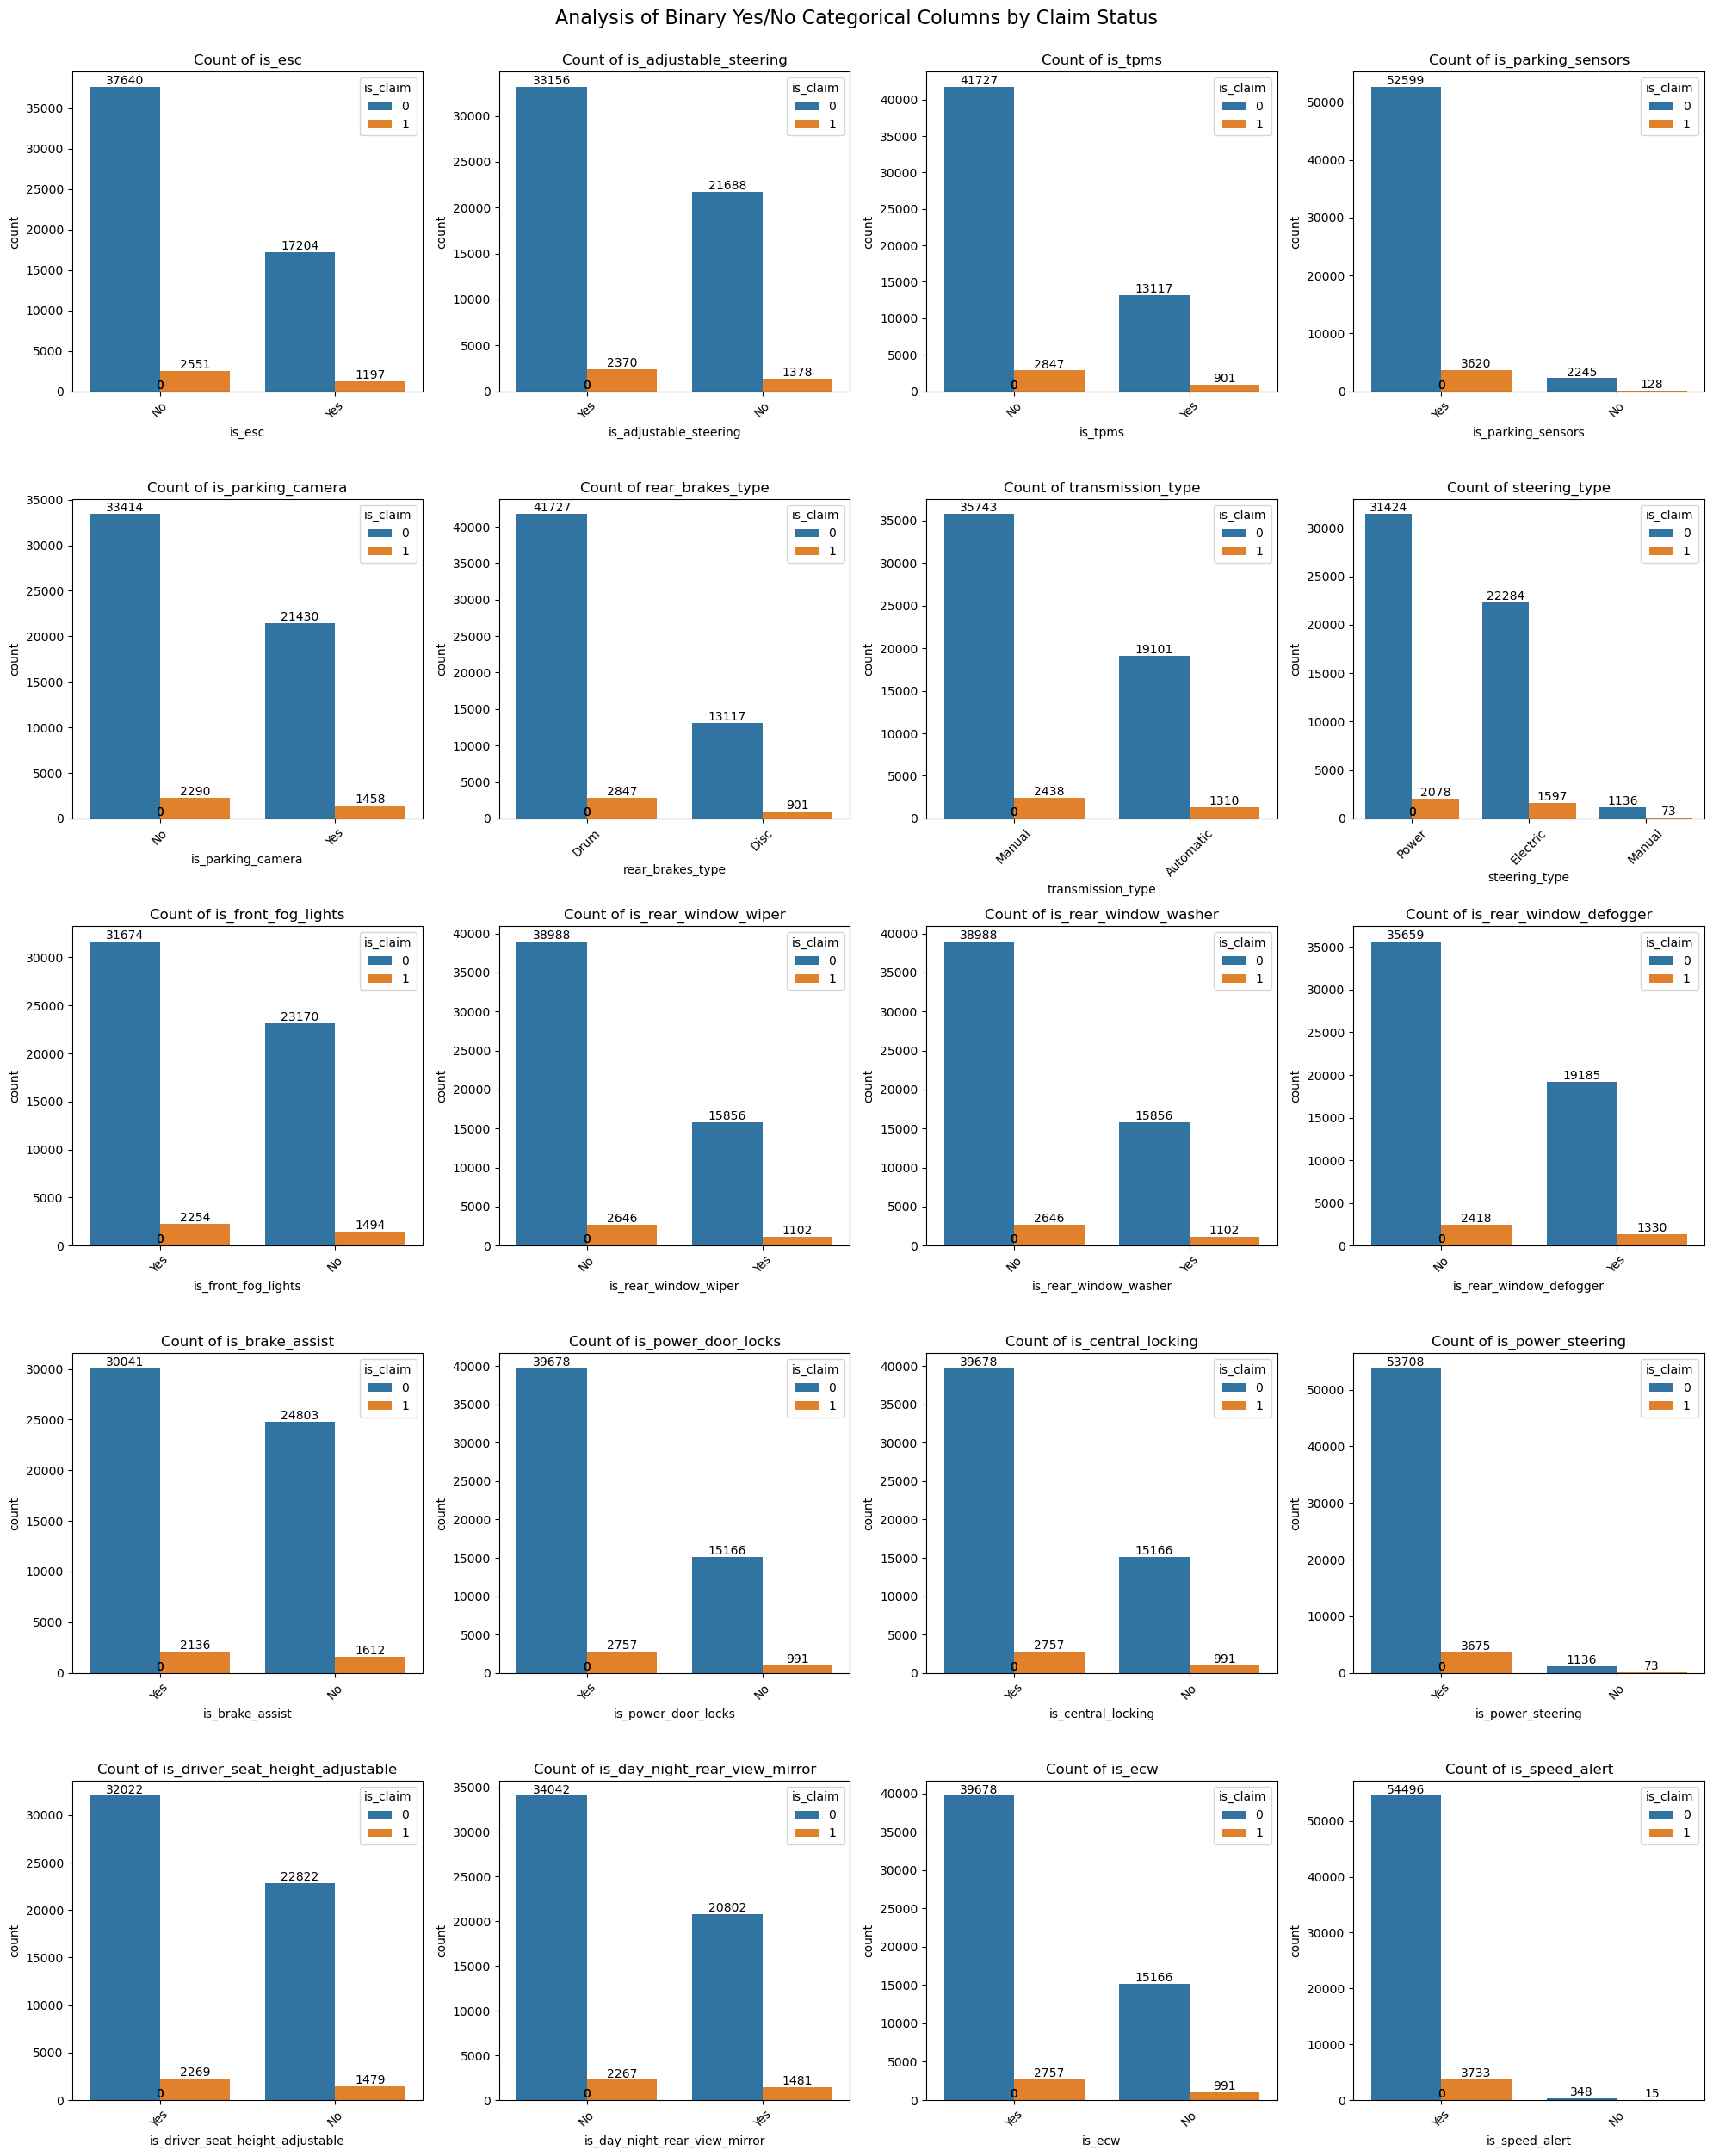

In [50]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
axes = axes.flatten()  # Flatten axes for easier indexing

fig.suptitle("Analysis of Binary Yes/No Categorical Columns by Claim Status", fontsize=16, y=1.0)
# Iterate over categorical variables and plot
for i, column in enumerate(list(categorical_columns.iloc[:,8::].columns)):
    order = data[column].value_counts().index
    ax1 = sns.countplot(data=data, x=column,hue='is_claim', ax=axes[i], order=order)
    axes[i].set_title(f'Count of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
for column in list(categorical_columns.iloc[:,8:].columns):
    print('*'*10 +' '+ column +' '+'*'*10 )
    print(data.groupby([column,'is_claim'])['is_claim'].count())
    print() 

********** is_esc **********
is_esc  is_claim
No      0           37640
        1            2551
Yes     0           17204
        1            1197
Name: is_claim, dtype: int64

********** is_adjustable_steering **********
is_adjustable_steering  is_claim
No                      0           21688
                        1            1378
Yes                     0           33156
                        1            2370
Name: is_claim, dtype: int64

********** is_tpms **********
is_tpms  is_claim
No       0           41727
         1            2847
Yes      0           13117
         1             901
Name: is_claim, dtype: int64

********** is_parking_sensors **********
is_parking_sensors  is_claim
No                  0            2245
                    1             128
Yes                 0           52599
                    1            3620
Name: is_claim, dtype: int64

********** is_parking_camera **********
is_parking_camera  is_claim
No                 0           33414
 

In [69]:
for column in list(categorical_columns.iloc[:,8:].columns):
    print('*'*10 +' '+ column +' '+'*'*10 )
    print(data.groupby([column,'is_claim'])['is_claim'].count()/ data.value_counts(subset=column)*100)
    print() 

********** is_esc **********
is_esc  is_claim
No      0           93.652808
        1            6.347192
Yes     0           93.494919
        1            6.505081
dtype: float64

********** is_adjustable_steering **********
is_adjustable_steering  is_claim
No                      0           94.025839
                        1            5.974161
Yes                     0           93.328830
                        1            6.671170
dtype: float64

********** is_tpms **********
is_tpms  is_claim
No       0           93.612868
         1            6.387132
Yes      0           93.572550
         1            6.427450
dtype: float64

********** is_parking_sensors **********
is_parking_sensors  is_claim
No                  0           94.605984
                    1            5.394016
Yes                 0           93.560896
                    1            6.439104
dtype: float64

********** is_parking_camera **********
is_parking_camera  is_claim
No                 0          

**Observations:**

* **`is_esc`**, **`is_tpms`**, **`is_parking_sensors`**, **`is_parking_camera`**, **`is_brake_assist`**, **`is_power_door_locks`**, **`is_central_locking`**, **`is_driver_seat_height_adjustable`**, and **`is_speed_alert`**: 
    - Vehicles with these features generally show a slightly higher claim rate compared to those without. The differences are modest, but they suggest a potential association between these features and higher claim probabilities.

* **`steering_type`**: **Manual steering** vehicles exhibit a slightly lower claim rate (6.04%) compared to **electric** (6.69%) and **power** steering vehicles (6.20%).

* **`rear_brakes_type`**: **Drum brakes** show a slightly higher claim rate (6.39%) compared to **disc brakes**. though there isn't much difference between the both

* **`is_front_fog_lights`, `is_rear_window_wiper`, `is_rear_window_washer`, `is_rear_window_defogger`**: These features show only minimal differences in claim rates, with the presence of these features generally associated with slightly higher claims.

* **`is_ecw`**: **Vehicles with ECW (Emergency Crash Warning)** show a lower claim rate (6.13%) compared to those without ECW (6.50%), indicating a potential inverse correlation between this feature and claims.

In summary, features like **`ESC`**, **`power steering`**, and **`adjustable seat height`** tend to show higher claim rates.

-----

### Final Analysis and Key Observations:

#### **Data Summary:**
- **Total Rows:** 58,592
- **Total Columns:** 44
- **Data Types Overview:**
  - **float64:** 4 columns (numerical, likely continuous)
  - **int64:** 12 columns (including target, counts, or binary features)
  - **object:** 28 columns (categorical)

#### **Outlier Handling:**
- **Outliers in Numerical Features:** Outliers in certain numerical features will be handled by removing values beyond the **99th percentile**, ensuring that extreme values do not distort model performance.

#### **Key Analysis:**

**Numerical Features:**
- **Distributions:**
  - **Skewed Distributions:** Several numerical features show right skewness, including variables like `policy_tenure`, which has a long tail.
  - **Non-Normal Distributions:** Some numerical features do not follow a normal distribution (e.g., `population`, `policy_tenure`)
  
- **Feature Interpretation:**
  - **Non-Raw Form:** The numerical features  `policy_tenure`, `age_of_car`,`age_of_policyholder` are not in their raw or literal form, which makes direct interpretation difficult, without more information
  
**Categorical Features:**
- **Key Observations:**
   - **`make`**, **`displacement`**, **`Model`**, **`area_cluster`**, **`ESC`**, **`power_steering`**, **`is_driver_seat_height_adjustable`**: These features show higher claim rates and should be investigated further for their relationship with claim prediction.
  - **Steering Type** (manual, electric, power) and **Brake Type** (drum, disc) are also noteworthy, as they show slight differences in claims, though not as significant.


#### **Class Imbalance:**
- **Target Variable Imbalance:** The dataset exhibits class imbalance in the target variable `is_claim`, with a larger proportion of vehicles having no claims (minority class). This imbalance should be carefully addressed gor modelling.

#### **Handling Non-Normal Distributions:**
- **Skewed Features:** Many numerical features are not normally distributed, which can affect the performance of models that assume normality (e.g., linear regression). Applying transformations (e.g., logarithmic, square root) can improve model accuracy by normalizing distributions.


----

### Feature Engineering:

1. **Remove Unnecessary Columns**: 
   - Identify and drop columns that do not contribute significantly to the model (e.g., highly missing values, irrelevant identifiers).

2. **Handle Outliers**: 
   - For numerical columns, remove the 99th percentile values to mitigate the influence of extreme outliers.

3. **Correct Data Types and creating new column**:
   - Convert columns with fewer than 10 unique values into their appropriate categorical type.
   - Ensure all columns are transformed into their correct data types (e.g., datetime, categorical, numerical).
   - **Engineer `volume` Column**: Create a new `volume` feature using the formula `volume = length × width × height` if these dimensions are available, adding more granular detail to the dataset.

4. **Feature Selection Process**:
   - **Multicollinearity Check**: For numerical features, calculate the Variance Inflation Factor (VIF) and drop features with high multicollinearity.
   - **Mutual Information**: For categorical features, use Mutual Information to assess the dependency of each feature with the target variable and select the most informative ones.

5. **Data Splitting**:
   - Split the dataset into `X` (features) and `y` (target variable).
   - Perform a train-test split to ensure a robust evaluation.

6. **Best Feature Selection**:
   - Apply Mutual Information on the training set to select the top categorical features.
   - Combine selected features from both numerical and categorical analyses for the final feature set for model training

**1. Remove Unnecessary Columns**
* Remove the **`policy_id`** column as it serves only as a unique identifier for each record and does not contribute any valuable information for model prediction.

In [3]:
data = data.drop(['policy_id'],axis =1)

**2. Handle Outliers**

In [7]:
# Removing outliers as per the analysis before
# outlier values after the 99th percentile being removed
data = data.loc[~extreme_age_indices]
data=data.loc[~extreme_age_of_policyholder_indices]

**3. Convert Categorical Features**
* Convert all columns with fewer than 10 unique values into object data type for better categorical handling.

In [8]:
# converting columns into categorical that has less than 10 unique values
for col in list(data.columns):
    if len(data[col].unique()) < 10:
        data[col] = data[col].astype('object')

In [10]:
# changing population_density column datatype from object to float
data['population_density'] = data['population_density'].astype('float64')

In [13]:
# length, width, height can be represented as one column that is volume
# Using the natural log of volume helps in normalizing the feature and making it more suitable for modeling, 
            #  as it compresses the range of values, ensuring that the model does not overemphasize larger values.
data['volume'] = np.log(data['length'].astype('int64')*data['width']*data['height']*1e-6)
data = data.drop(['length','width','height'],axis=1)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57550 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     57550 non-null  float64
 1   age_of_car                        57550 non-null  float64
 2   age_of_policyholder               57550 non-null  float64
 3   area_cluster                      57550 non-null  object 
 4   population_density                57550 non-null  float64
 5   make                              57550 non-null  object 
 6   segment                           57550 non-null  object 
 7   model                             57550 non-null  object 
 8   fuel_type                         57550 non-null  object 
 9   max_torque                        57550 non-null  object 
 10  max_power                         57550 non-null  object 
 11  engine_type                       57550 non-null  object 
 12  airbags  

4. **Feature Selection**:

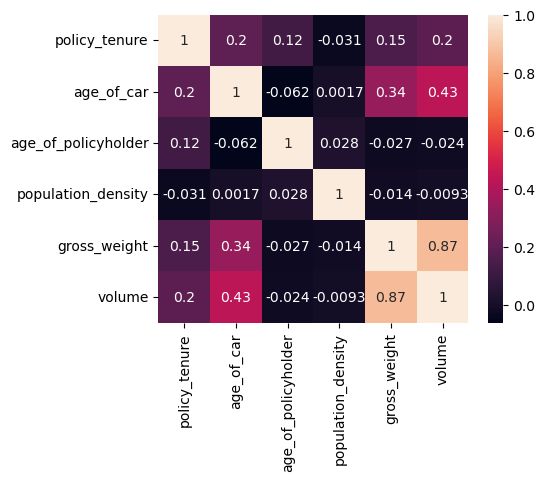

In [14]:
# Since many of the features in your dataset might not follow a linear relationship, using Spearman correlation
                        # helps identify meaningful associations between variables regardless of their scale or distribution.
plt.figure(figsize=(5,4))
sns.heatmap(data.select_dtypes(exclude='object').corr(method='spearman'),annot=True)
plt.show()

It appears that `gross_weight` and `volume` are highly correlated **(0.87)**, meaning they are likely providing redundant information. 
Since volume is derived from length, width, and height, which are more meaningful features, it makes sense to remove the `gross_weight` column to avoid multicollinearity and reduce model complexity without losing valuable information.

In [15]:
# removing gross_weight column
data = data.drop(['gross_weight'],axis = 1)

* Since Mutual Information requires numerical inputs to assess feature importance, we first need to encode all categorical values. To ensure the evaluation results are reliable and free from data leakage, we split the data into train and test sets beforehand, preventing any overlap that could make the model's performance unreliable.

**Train Test split**

In [16]:
X = data.drop(['is_claim'], axis = 1)
y = data['is_claim'].astype('int64')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Encoding categorical columns**

* Various encoding methods like OneHotEncoding, TargetEncoding, and LabelEncoding are available. I chose LabelEncoding as it converts categories into numerical values by assigning each category to a number.
     - LabelEncoder assumes that the categories of a column have a specified order (i.e. ordinal)

* Although the data lacks inherent order, LabelEncoding is used to assign a numeric label to each unique category. I chose this over OneHotEncoding to avoid an creating more columns, increasing the cardinality. The potential ordering issue from LabelEncoding is accounted for during model selection, ensuring that the chosen models are not negatively impacted by the encoded values.

In [19]:
from sklearn.preprocessing import LabelEncoder
for col in list(X_train.select_dtypes(include='object')):
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
X_train.head()

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
7131        0.085303        0.06             0.365385            19   
54700       0.719494        0.10             0.548077             4   
46680       1.145016        0.03             0.336538            13   
5262        1.012593        0.07             0.326923             4   
45095       0.035940        0.06             0.471154             4   

       population_density  make  segment  model  fuel_type  max_torque  ...  \
7131               6112.0     2        4      5          1           4  ...   
54700              5410.0     2        4      5          1           4  ...   
46680              3264.0     0        1      9          0           6  ...   
5262               5410.0     0        2      7          2           0  ...   
45095              5410.0     1        0      4          2           8  ...   

       is_brake_assist  is_power_door_locks  is_central_locking  \
7131                 1                    1                   1   
54700                1                    1                   1   
46680                0                    1                   1   
5262                 1                    1                   1   
45095                0                    1                   1   

       is_power_steering  is_driver_seat_height_adjustable  \
7131                   1                                 1   
54700                  1                                 1   
46680                  1                                 0   
5262                   1                                 1   
45095                  1                                 0   

       is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
7131                               0       1               1            2   
54700                              0       1               1            2   
46680                              0       1               1            1   
5262                               1       1               1            1   
45095                              1       1               1            1   

         volume  
7131   9.440229  
54700  9.440229  
46680  9.202091  
5262   9.230804  
45095  9.079999  

[5 rows x 39 columns]

## Mutual Information

Since the data in this case does not follow a normal distribution, other feature selection tests like **p-value** tests may not be ideal. These tests often make assumptions about the data, such as normality, which are not met in this case. For instance:
- **p-value tests** (like z-tests, t-tests or ANOVA) assume normality in the distribution of the data.


On the other hand, **Mutual Information (MI)** does not have such strict assumptions and works well for both categorical and continuous features, making it a suitable choice to test for both numerical and categorical features.

**MI tells us how much one feature (independent variable) informs us about the target (dependent variable).**

MI is used for feature selection because features with higher MI are typically more informative for predicting the target variable, while features with lower MI can be discarded as less useful. MI is particularly useful for both numerical and categorical features.


In [22]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    """
    Calculate and return the Mutual Information (MI) scores between the features in X and the target variable y.
    This function calculates the MI scores using the `mutual_info_classif` function over multiple runs (5) to ensure stability 
    and reduces variability. The scores are averaged and returned as a sorted pandas Series with features ranked by importance.

    Parameters:
    X : pandas.DataFrame -> The feature set, where each column represents a feature and each row represents a sample.
    y : pandas.Series -> The target variable corresponding to the feature set, where each element represents the target value for each sample.

    Returns:
    pandas.Series -> A Series containing the MI scores for each feature in X, sorted in descending order by the MI score.
    
     Notes:
    - The function assumes that discrete features (integer dtype) are properly handled and passed in `X`.
    - The function runs the MI calculation 5 times with different random states and averages the results to reduce variability.
    - MI scores provide an indication of the amount of information shared between each feature and the target variable, which helps in feature selection.
    """
    X = X.copy() # Copying X so that we won't effect the original dataset
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    all_mi_scores = []
    for random_state in range(0, 5):
        mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=random_state)
        all_mi_scores.append(mi_scores)
    all_mi_scores = np.mean(all_mi_scores, axis=0) 
    all_mi_scores = pd.Series(all_mi_scores, name="MI Scores", index=X.columns)
    all_mi_scores = all_mi_scores.sort_values(ascending=False)
    return all_mi_scores

In [23]:
mi_scores = make_mi_scores(X_train, y_train)
mi_scores

population_density                  1.860826e-03
age_of_car                          1.787321e-03
volume                              1.730352e-03
policy_tenure                       1.669404e-03
area_cluster                        8.504025e-04
age_of_policyholder                 3.197127e-04
model                               1.983474e-04
engine_type                         1.983474e-04
max_power                           1.918180e-04
displacement                        1.918180e-04
max_torque                          1.918180e-04
segment                             1.441120e-04
turning_radius                      1.432042e-04
cylinder                            1.134395e-04
is_adjustable_steering              1.062032e-04
is_brake_assist                     7.507887e-05
is_front_fog_lights                 7.369400e-05
fuel_type                           6.597930e-05
steering_type                       6.399238e-05
is_driver_seat_height_adjustable    6.350310e-05
make                

Text(0.5, 1.0, 'Mututal Information Scores')

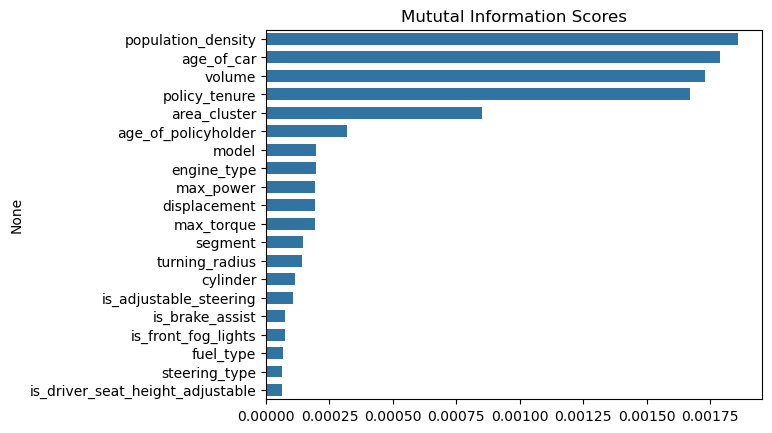

In [24]:
# plotting the top 20 mi_scores
sns.barplot( y = mi_scores.index[:20], x = mi_scores.values[:20], gap=0.2)
plt.title('Mututal Information Scores')

"Based on the mutual information (MI) scores, the following columns have been identified as significant contributors to predicting the target variable. 

`['population_density', 'age_of_car', 'volume', 'policy_tenure', 'area_cluster', 'age_of_policyholder', 'model', 'engine_type', 'max_power', 'displacement', 'max_torque', 'segment']`.

Interestingly, these columns were also highlighted during the exploratory data analysis (EDA) as potential important features, further supporting their relevance for the model.

**I choose the top 10 columns as these columns have significant infomration about the target column than later ones**

In [62]:
final_columns = list(mi_scores.iloc[:10].index)
final_columns

['population_density',
 'age_of_car',
 'volume',
 'policy_tenure',
 'area_cluster',
 'age_of_policyholder',
 'model',
 'engine_type',
 'max_power',
 'displacement']

In [63]:
X_train = X_train[final_columns]
X_test = X_test[final_columns]

## Handling Class Imbalance

In addressing the class imbalance in our dataset, we consider two primary methods: **oversampling the minority class** using SMOTE and **undersampling the majority class**. Each method has its advantages and potential drawbacks, which we will explore below.

**Approach:**
* We will implement both **SMOTENC** and **undersampling** methods to train our models and evaluate their performance. 

### a. Using SMOTE (Synthetic Minority Oversampling Technique)
**SMOTE** generates synthetic samples for the minority class by interpolating between existing minority class instances. This helps in balancing the dataset by increasing the number of minority class examples.

**SMOTENC (SMOTE for Categorical-Numerical Combined Data):**  Unlike standard SMOTE, **SMOTENC** handles both categorical and numerical features. It achieves this by interpolating numerical features and duplicating categorical features based on their frequency.

   - **Considerations with SMOTENC:**  
     - **Synthetic Sample Concerns:** One of the challenges with SMOTE and SMOTENC is that the synthetic samples may not be true representatives of the actual population. This can introduce noise, particularly when the class imbalance is very high, as in our case (94% majority vs. 6% minority).
     - **Risk of Overfitting:** The model might overfit to the synthetic samples, leading to unreliable performance metrics. Overfitting is particularly concerning in high imbalance scenarios because the synthetic data may not adequately capture the complexities of the minority class distribution.


In [32]:
from collections import Counter
from imblearn.over_sampling import SMOTENC

In [65]:
sme = SMOTENC(random_state=42, categorical_features=[4,6,7,8,9])
X_train_smote, y_train_smote = sme.fit_resample(X_train, y_train)

In [66]:
print("Before resampling: ", Counter(y_train))
print("After resampling: ", Counter(y_train_smote))

Before resampling:  Counter({0: 43098, 1: 2942})
After resampling:  Counter({0: 43098, 1: 43098})


### b. Random Undersampling of Majority Class 
This method involves reducing the number of majority class instances to match the minority class. By doing so, the dataset becomes more balanced without introducing synthetic data.
   
   - **Considerations with Undersampling:**  
     - **Data Loss:** A major drawback is the potential loss of valuable information from the majority class. By removing a significant portion of the majority class data, we may discard useful patterns that could help the model generalize better.

In [37]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

In [39]:
print("Before resampling: ", Counter(y_train))
print("After resampling: ", Counter(y_train_res))

Before resampling:  Counter({0: 43098, 1: 2942})
After resampling:  Counter({0: 2942, 1: 2942})


* **`X_train_smote, y_train_smote`** represent train sets resampled using SMOTENC
* **`X_train_res, y_train_res`** represent train sets resampled using RandomUnderSampler

## Model Training and Evaluation

* The numerical features in our dataset are transformed from their original raw form, and since we don’t have much information about their underlying distributions, applying scaling or normalization may not be appropriate.
* The Scaling or Normalization is important for Logistic Regression and KNN models to effectively work, so we are going to choose the models that flexible with the data we have.
* I chose to train the models using tree-based algorithms due to their flexibility and ability to handle both categorical and numerical features without requiring scaling or normalization. 
* Additionally, as categorical features are label-encoded, tree-based models won't be influenced by the numerical order assigned, making them ideal for this scenario.




In [40]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score,roc_curve 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [43]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
}

In [52]:
def train_evaluate_models(X_train,y_train,X_test,y_test,models):
    """
    Trains and evaluates multiple machine learning models on the given dataset.
    Parameters:
    X_train (DataFrame): Training features.
    y_train (Series): Training labels.
    X_test (DataFrame): Test features.
    y_test (Series): Test labels.
    models (dict): Dictionary of models to train with model names as keys.

    Returns:
    DataFrame: A sorted DataFrame with model evaluation metrics (Accuracy, Precision, Recall, ROC_AUC).
    """
    model_list = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    roc_auc_list = []
    for i in range(len(list(models))):
        
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
        # Train set perfromance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall,model_train_rocauc_score = evaluation(y_train,y_train_predicted)
        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluation(y_test,y_test_predicted)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i]) # append the model to the list
        
        evaluation_scores(y_train,y_test, y_train_predicted,y_test_predicted) #printing the scores
        
        print('='*35)
        print('\n')
        
        # append all the calcualted metrics to the lists
        accuracy_list.append(model_test_accuracy)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        roc_auc_list.append(model_test_rocauc_score)
        
    report = pd.DataFrame(list(zip(model_list,accuracy_list,precision_list,recall_list,roc_auc_list)),columns = ['Model name','Accuracy','Precision','Recall','ROC_AUC']).sort_values(by=['Accuracy'],ascending=False)
    return report

In [45]:
def evaluation(true,predicted):
    """
    Evaluates various metrics of a classification model
    """
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) # Calcualte ROC_AUC
    return acc, f1 , precision, recall, roc_auc
    

In [54]:
def evaluation_scores(y_train,y_test,y_train_predicted,y_test_predicted):
    """
    Evaluates and prints classifications metrics for both test and train sets
    """
    # Training set performance
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall,model_train_rocauc_score = evaluation(y_train,y_train_predicted)
    # Test set performance
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluation(y_test,y_test_predicted)
        
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1)) 
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

**Training on SMOTENC Sampled train set**

In [71]:
base_model_report = train_evaluate_models(X_train=X_train_smote,y_train=y_train_smote,X_test=X_test,y_test=y_test,models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8900
- F1 score: 0.0732
- Precision: 0.0790
- Recall: 0.0682
- Roc Auc Score: 0.5071


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8597
- F1 score: 0.0901
- Precision: 0.0768
- Recall: 0.1091
- Roc Auc Score: 0.5099


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8989
- F1 score: 0.8935
- Precision: 0.9440
- Recall: 0.8482
- Roc Auc Score: 0.8989
----------------------------------
Model performance for Test set
- Accuracy: 0.8973
- F1 score: 0.1218
- Precision: 0.1338
- Recall: 0.1119
- Roc Auc Score: 0.5313


XGBClassifier
Model performance for Training set
- 

In [72]:
base_model_report

Model name  Accuracy  Precision    Recall   ROC_AUC
3      XGBClassifier  0.925543   0.112500  0.024557  0.505690
2  Gradient Boosting  0.897307   0.133768  0.111869  0.531299
0      Random Forest  0.890009   0.078989  0.068213  0.507058
1      Decision Tree  0.859687   0.076775  0.109141  0.509938

* The **XGBClassifier** and **RandomForest** models yield good accuracy; however, other critical metrics, particularly **recall**, are significantly low. This indicates that these models are struggling to effectively capture the minority class (class 1).
* Additionally, the models exhibit signs of **overfitting**, as evidenced by their good results in train data and poor results to test data. To address this, we will perform **hyperparameter tuning** on these top-performing models and try to mitigate overfitting and improve their ability to generalize, especially focusing on enhancing recall.


### Hyperparameter Tuning
We perform hyperparameter tuning using GridSearchCV for both XGBoost and RandomForest models to identify the optimal hyperparameters. After finding the best configuration, we evaluate the performance of the models on the test data and see if they perform well.

In [45]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [4, 7, 9],
    'gamma': [0.1, 0.3, 0.5],
    'n_estimators': [100, 200, 300],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='recall',  # Focus on recall
    cv=5, # cross-validation
    n_jobs=-1,
    verbose=2
)

xgb_grid_search.fit(X_train_res, y_train_res)
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost:  {'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 300}


In [181]:
# Evaluating the model on the best hyperparameters
model = XGBClassifier(n_estimators=300,eval_metric="logloss", random_state=42, max_depth = 2, gamma=0.1,min_child_weight=4)
model.fit(X_train_smote,y_train_smote)
        
y_train_predicted = model.predict(X_train_smote)
y_test_predicted = model.predict(X_test)

evaluation_scores(y_train_smote,y_test, y_train_predicted,y_test_predicted)

Model performance for Training set
- Accuracy: 0.5151
- F1 score: 0.5736
- Precision: 0.5119
- Recall: 0.6522
- Roc Auc Score: 0.5151
----------------------------------
Model performance for Test set
- Accuracy: 0.3950
- F1 score: 0.1180
- Precision: 0.0651
- Recall: 0.6357
- Roc Auc Score: 0.5072


In [ ]:
# Define parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='recall',  # Focus on recall
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train_res, y_train_res)

print("Best parameters for RandomForest: ", rf_grid_search.best_params_)

In [99]:
model = RandomForestClassifier(n_estimators= 100,criterion='entropy', max_depth= 2, min_samples_leaf= 4, max_features= 'sqrt')
model.fit(X_train_smote,y_train_smote)
        
y_train_predicted = model.predict(X_train_smote)
y_test_predicted = model.predict(X_test)

evaluation_scores(y_train_smote,y_test, y_train_predicted,y_test_predicted)

Model performance for Training set
- Accuracy: 0.6275
- F1 score: 0.6650
- Precision: 0.6041
- Recall: 0.7396
- Roc Auc Score: 0.6275
----------------------------------
Model performance for Test set
- Accuracy: 0.5239
- F1 score: 0.1509
- Precision: 0.0851
- Recall: 0.6644
- Roc Auc Score: 0.5894


After experimenting with various hyperparameters its is observed that the maximum recall being achieved on various hyperparmas is around 0.65 with a cost of reduced accuracy and no significant improvement in other metrics such as F1 precision and roc_auc,
we will also train on undersampled data and check if the performance improves.

In [100]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67     10777
           1       0.09      0.66      0.15       733

    accuracy                           0.52     11510
   macro avg       0.52      0.59      0.41     11510
weighted avg       0.90      0.52      0.64     11510



* After experimenting with various hyperparameters, it was observed that the maximum recall achieved is approximately **0.65**, but this comes at the cost of **reduced accuracy**. 
* Additionally, there was no significant improvement in accuracy
* Also, there are no significant improvements in **Precision, F1_score and ROC_AUC** metrics before and after hyperparameter tuning.
* To further improve performance, we will also train the model on undersampled data and evaluate whether this approach leads to better performance across the metrics.

**Overview on training with SMOTENC training set:**

In **SMOTENC** sampling, the models initially showed signs of **overfitting**. However, through extensive **hyperparameter tuning** and experimenting with various hyperparameters, I was able to significantly improve the **recall** at the cost of model **accuracy**. This represents the maximum achievable performance for the given data under the constraints of the business problem.

The **best model** is **RandomForestClassifier** and the hyperparameters used are:

- **n_estimators= 100, criterion='entropy', max_depth= 2, min_samples_leaf= 4, max_features= 'sqrt'**



----

### b. Random Undersampling of Majority Class 
This method involves reducing the number of majority class instances to match the minority class. By doing so, the dataset becomes more balanced without introducing synthetic data.
   
   - **Considerations with Undersampling:**  
     - **Data Loss:** A major drawback is the potential loss of valuable information from the majority class. By removing a significant portion of the majority class data, we may discard useful patterns that could help the model generalize better.

In [73]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
# Apply undersampling to the training data
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

In [74]:
print("Before resampling: ", Counter(y_train))
print("After resampling: ", Counter(y_train_res))

Before resampling:  Counter({0: 43098, 1: 2942})
After resampling:  Counter({0: 2942, 1: 2942})


In [75]:
base_model_report = train_evaluate_models(X_train=X_train_res,y_train=y_train_res,X_test=X_test,y_test=y_test,models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5722
- F1 score: 0.1542
- Precision: 0.0882
- Recall: 0.6126
- Roc Auc Score: 0.5910


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5262
- F1 score: 0.1310
- Precision: 0.0741
- Recall: 0.5607
- Roc Auc Score: 0.5423


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6626
- F1 score: 0.6823
- Precision: 0.6447
- Recall: 0.7247
- Roc Auc Score: 0.6626
----------------------------------
Model performance for Test set
- Accuracy: 0.5506
- F1 score: 0.1644
- Precision: 0.0933
- Recall: 0.6944
- Roc Auc Score: 0.6176


XGBClassifier
Model performance for Training set
- 

In [102]:
base_model_report

Model name  Accuracy  Precision    Recall   ROC_AUC
0      Random Forest  0.572198   0.088230  0.612551  0.591002
3      XGBClassifier  0.552824   0.086084  0.626194  0.587014
2  Gradient Boosting  0.550565   0.093258  0.694407  0.617594
1      Decision Tree  0.526151   0.074148  0.560709  0.542255


* There are evident signs of overfitting in the models, as they exhibit poor generalization on the test data. However, it’s notable that all base models trained with undersampling demonstrate significantly better recall compared to those trained with SMOTE. Despite the improvement in recall, other metrics such as accuracy and precision are lower. 

* To address this, we will focus on hyperparameter tuning for the top-performing models to see if we can achieve a better balance between recall and the other evaluation metrics, while also mitigating overfitting.


In [71]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [4, 7, 9],
    'gamma': [0.1, 0.3, 0.5],
    'n_estimators': [100, 200, 300],
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='recall',  # Focus on recall
    cv=5,
    n_jobs=-1,
    verbose=2
)
xgb_grid_search.fit(X_train_res, y_train_res)
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost:  {'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100}


In [199]:
#Note: The below parameters resulted in maximum train score but resulted in very poor test scores, these are values from trail and error started with the above gained hyperparams
model_xgb = XGBClassifier(n_estimators= 405, max_depth= 5, learning_rate = 0.037, gamma = 4.96) 
model_xgb.fit(X_train_res,y_train_res)
        
y_train_predicted = model_xgb.predict(X_train_res)
y_test_predicted_xgb = model_xgb.predict(X_test)
        
        # Training set performance
model_train_accuracy, model_train_f1, model_train_precision, model_train_recall,roc_auc_s = evaluation(y_train_res,y_train_predicted)
        
        # Test set performance
model_test_accuracy, model_test_f1, model_test_precision, model_test_recall,roc_auc_s_test = evaluation(y_test,y_test_predicted_xgb)

evaluation_scores(y_train_res,y_test, y_train_predicted,y_test_predicted_xgb)

Model performance for Training set
- Accuracy: 0.6434
- F1 score: 0.6736
- Precision: 0.6211
- Recall: 0.7359
- Roc Auc Score: 0.6434
----------------------------------
Model performance for Test set
- Accuracy: 0.5280
- F1 score: 0.1668
- Precision: 0.0940
- Recall: 0.7422
- Roc Auc Score: 0.6278


In [72]:
# Define parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='recall',  # Focus on recall
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(X_train_res, y_train_res)
print("Best parameters for RandomForest: ", rf_grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for RandomForest:  {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [226]:
model_rf = RandomForestClassifier(n_estimators= 150,criterion='entropy', max_depth= 2, min_samples_leaf= 3, min_samples_split= 4, max_features= 'log2')
model_rf.fit(X_train_res,y_train_res)
        
y_train_predicted = model_rf.predict(X_train_res)
y_test_predicted_rf = model_rf.predict(X_test)
        
        # Training set performance
model_train_accuracy, model_train_f1, model_train_precision, model_train_recall,model_train_rocauc_score = evaluation(y_train_res,y_train_predicted)
        
        # Test set performance
model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluation(y_test,y_test_predicted_rf)
evaluation_scores(y_train_res,y_test, y_train_predicted,y_test_predicted_rf)

Model performance for Training set
- Accuracy: 0.6162
- F1 score: 0.6621
- Precision: 0.5914
- Recall: 0.7519
- Roc Auc Score: 0.6162
----------------------------------
Model performance for Test set
- Accuracy: 0.4819
- F1 score: 0.1586
- Precision: 0.0884
- Recall: 0.7667
- Roc Auc Score: 0.6146


* In **RandomUndersampling** sampling, the model performed better than **SMOTE** versions. 
* Through extensive **hyperparameter tuning** and experimenting with various hyperparameters, I was able to significantly improve the **recall** from base model, yet many other metrics **accuracy**,**F1 score** and **precision** see no significant improvement.
* There is, a slight improvement in the models' ability to distinguish between classes, as evidenced by a slight increase in ROC_AUC scores. 
* This represents the maximum achievable performance for the given data under the constraints of the business problem.

**Further examination is needed to determine the best model between the two.**

In [227]:
print('*'*10 + ' XGBoost Classification Report ' + '*'*10)
print(classification_report(y_test, y_test_predicted_xgb))
print()
print('*'*10 + ' RandomForest Classifier Report ' + '*'*10)
print(classification_report(y_test, y_test_predicted_rf))

********** XGBoost Classification Report **********
              precision    recall  f1-score   support

           0       0.97      0.51      0.67     10777
           1       0.09      0.74      0.17       733

    accuracy                           0.53     11510
   macro avg       0.53      0.63      0.42     11510
weighted avg       0.91      0.53      0.64     11510


********** RandomForest Classifier Report **********
              precision    recall  f1-score   support

           0       0.97      0.46      0.63     10777
           1       0.09      0.77      0.16       733

    accuracy                           0.48     11510
   macro avg       0.53      0.61      0.39     11510
weighted avg       0.91      0.48      0.60     11510



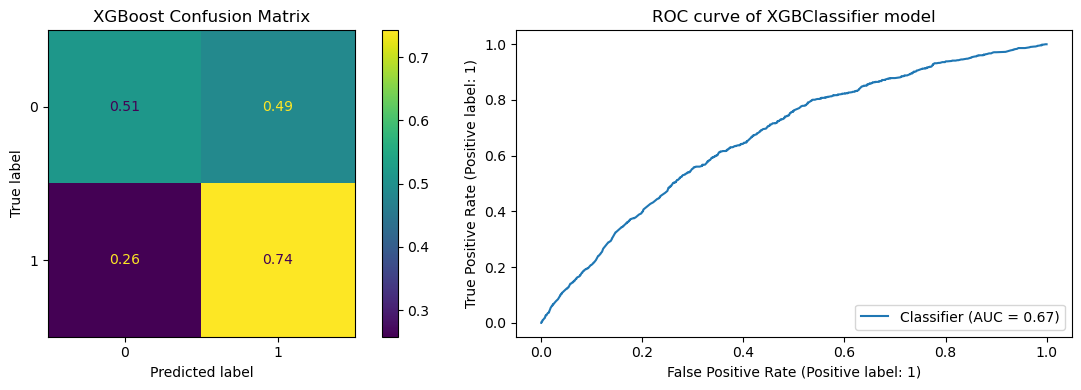

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_xgb, normalize='true', ax=axes[0])
axes[0].set_title('XGBoost Confusion Matrix')

y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, ax=axes[1])
axes[1].set_title('ROC curve of XGBClassifier model')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'ROC curve of RandomForest')

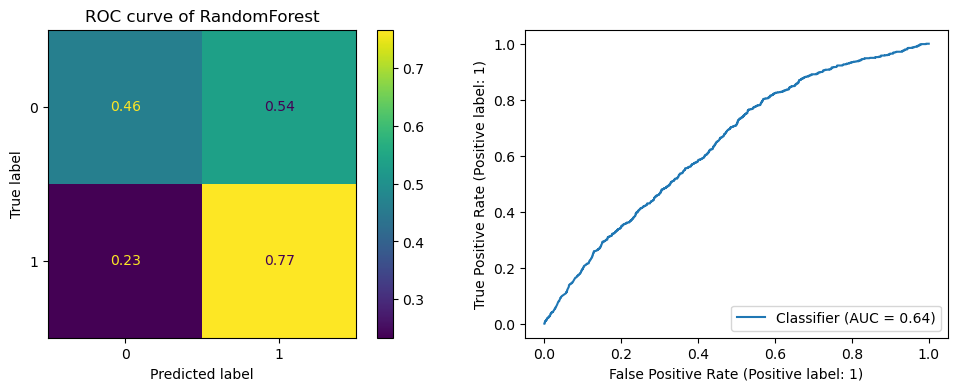

In [238]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_rf, normalize='true', ax=axes[0])
axes[0].set_title('RandomForest Confusion Matrix')

y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_proba_rf, ax=axes[1])
axes[0].set_title('ROC curve of RandomForest')

**Model Selection Conclusion:**

After evaluating both the Random Forest (RF) and XGBoost (XGB) models, it is observed that while both models show similar overall performance, there are distinct differences in their key metrics.

- **Random Forest** achieves a higher recall of 0.77, indicating better performance in identifying claims (class 1), but its accuracy is lower at 0.46. Additionally, the AUC score is slightly lower than XGB at 0.66, which means the model struggles a bit with distinguishing between classes 0 and 1.
  
- **XGBoost**, on the other hand, delivers a slightly lower recall of 0.74, but its accuracy is higher at 0.51, along with a higher AUC score of 0.67. This suggests that while it may miss a few claims (class 1), it is better at overall class differentiation, which is important for our task.

Given that both **recall** and **AUC** (ability to distinguish between classes) are important for this problem, and since XGBoost demonstrates slightly better AUC and accuracy, I have chosen **XGBoost** as the final model for further deployment and evaluation.

The **best model** is **XGBoost Classifier** under **RandomUnderSampler**, and the hyperparameters used are:

- **n_estimators= 405, max_depth= 5, learning_rate = 0.037, gamma = 4.96**

With the best recall score of **0.74**, the model successfully identifies the target class with the highest priority for this use case.

#### Let's analyze the key features that played a significant role in the model's predictions.

In [248]:
feature_importance = model_xgb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': feature_importance  # Feature importance scores
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

               Feature  Importance
3        policy_tenure    0.204246
1           age_of_car    0.175391
2               volume    0.115007
9         displacement    0.094482
6                model    0.088246
8            max_power    0.084741
4         area_cluster    0.065815
5  age_of_policyholder    0.059881
0   population_density    0.057645
7          engine_type    0.054548


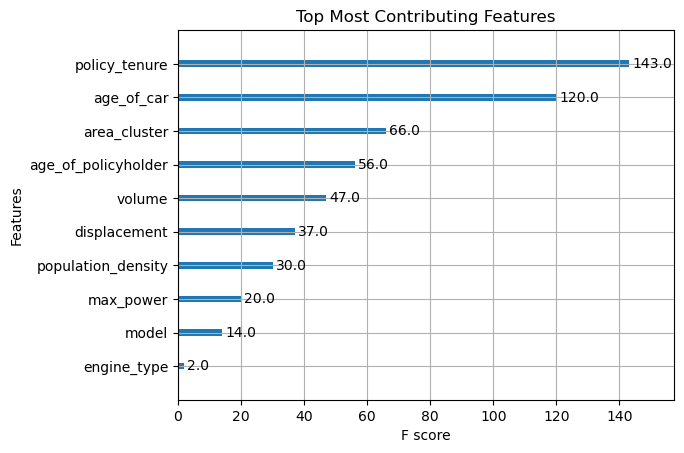

In [249]:
import xgboost
xgboost.plot_importance(model_xgb, importance_type='weight')
plt.title('Top Most Contributing Features')
plt.show()

It appears that the features **`policy_tenure`**, **`age_of_car`**, **`area_cluster`**, and **`age_of_policyholder`** are key contributors to the model's predictions. 

### Final Conclusion:

1. **Feature Selection and Importance**:
   After performing feature selection, we identified the most important features impacting the claim prediction. The top contributing features include **policy_tenure**, **age_of_car**, **volume**, **displacement**, **model**, **max_power**, **area_cluster**, and **age_of_policyholder**. These features provide crucial insights into the model’s predictions and should be closely monitored for better future results.

2. **Model Training and Selection**:
   Given the nature of the data and the importance of handling both imbalanced classes and differentiating between the two target classes, we chose to use **tree-based models**. After experimenting with several models, **XGBoost** emerged as the best-performing model due to its higher ability to distinguish between classes, as reflected by its better AUC and accuracy compared to other models like Random Forest. 

3. **Hyperparameters and Best Performance**:
   The final **XGBoost Classifier** was trained under the **RandomUnderSampler** with the following hyperparameters:
   - **n_estimators** = 405  
   - **max_depth** = 5  
   - **learning_rate** = 0.037  
   - **gamma** = 4.96  
   These settings resulted in a **best recall score of 0.74**, successfully capturing the high-priority class (claims) while maintaining an acceptable balance in accuracy and AUC.

4. **Key Features Impacting Claims**:
   Our analysis indicates that the **`policy_tenure`**, **`age_of_car`**, **`area_cluster`**, and **`age_of_policyholder`** are key drivers in predicting insurance claims. These features should be explored further, as they significantly influence the model’s ability to make accurate predictions.

5. **Data and Further Improvements**:
   While the current model demonstrates promising performance, additional high-quality data would further improve accuracy and model robustness.

In conclusion, **XGBoost** is the chosen model for further deployment, given its performance in identifying key predictors of insurance claims. However, the accuracy of the model can be further improved with more detailed data and continual refinement of the features used.